# Runge-Kutta



Tenemos una relación exacta

$$
\vec y_{n+1}=\vec y_n+ \int \limits_{x_n}^{x_{n+1}} f(x,\vec y) dx  \qquad ----(1)
$$

Lo mejor es expandir a f en su serie de Taylor y encontrar las derivadas en terminos de puntos

$$
f(x)=f(x_0)+f'(x_0)+f''(x_0) \frac{x²}{2!}+ O(h²) \qquad ----(2)
$$
con $x$ perteneciendo a [0,h]
Cuando metemos eso a (1) el termino lineal se muere en un intervalo simétrico. Tomamos nuestro punto de desarrollo  como el punto medio (para quitarse los términos impares de la expansión)

$$
\vec y_{n+1}= \vec y_n + h \vec f (x_{n+1/2}, \vec y_{n+1/2})+ O(h³)
$$

Con $x_{n+1/2}= \frac{x_{n+1}+x_n}{2}$ y $h=x_{n+1}-x_n$. El problema sería decir quién es $y_{n+1/2}$. Lo solucionamos con  Euler:

$$
\vec y_{n+1/2}=\vec y_n +\frac{h}{2}f(x_n,y_n)
$$

Por lo tanto 


$$
\vec y_{n+1}= \vec y_n + h \vec f (x_{n} +1/2, \vec y_n +\frac{h}{2}f(x_n,y_n))+ O(h³)
$$


$k:=h f(x_n,y_n) \implies \vec y_{n+1}= \vec y_n + h \vec f (x_{n} +1/2, \vec y_n +\frac{1}{2}k)+ O(h³)$

VENTAJA DE ESTE: NO OCUPA EL JACOBIANO

In [5]:
from pylab import *
from numpy import *
%matplotlib inline

In [29]:
def runge(ec, p_ini, x, h=0.1):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))    #p_ini son todas las condiciones inciales
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):    #Solución: matriz cuyo i-ésimo renglón sea la soluciónal tiempo t_i. xrange sirva para hacer ranges y que no ocupen memoria"""
        k=ec(sol[i,:], tiempos[i])*h
        sol[i+1,:]=sol[i,:]+h*ec(sol[i,:]+0.5*k, tiempos[i]+.5*h)
    return  tiempos,sol

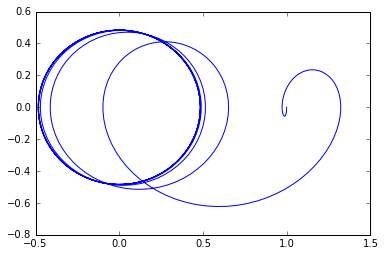

In [36]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+sin(t)])


t,y=runge(p,[1,0],[0,50])
                 
#plot (t,y[:,0])
plot (y[:,0],y[:,1])
show()